# Ajuste de curvas

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/a/a8/Regression_pic_assymetrique.gif" width="400px" height="125px" />

> El **ajuste de curvas** es el proceso de construir una curva (función), que sea el mejor ajuste a una serie de puntos. Las curvas ajustadas pueden ser usadas como asistencia en la visualización de datos, para inferir valores de una función donde no hay datos disponibles, y para resumir la relación entre variables.

**Referencia**:
- https://en.wikipedia.org/wiki/Curve_fitting
___

## 0. Introducción

Consideremos un polinomio de grado uno:

$$y = \beta_1 x + \beta_0.$$

Esta es una **línea recta** que tiene pendiente $\beta_1$. Sabemos que habrá una línea conectando dos puntos cualesquiera. Por tanto, *una ecuación polinómica de primer grado es un ajuste perfecto entre dos puntos*.

Si consideramos ahora un polinomio de segundo grado,

$$y = \beta_2 x^2 + \beta_1 x + \beta_0,$$

este se ajustará exactamente a tres puntos. Si aumentamos el grado de la función a la de un polinomio de tercer grado, obtenemos:

$$y = \beta_3 x^3 + \beta_2 x^2 + \beta_1 x + \beta_0,$$

que se ajustará a cuatro puntos.

**Ejemplos**
1. Encontrar la línea recta que pasa exactamente por los puntos $(0,1)$ y $(1,0)$.
2. Encontrar la parábola que pasa exactamente por los puntos $(-1,1)$, $(0,0)$ y $(1,1)$.

**Solución**
1. Consideramos $y=\beta_1 x + \beta_0$. Evaluando en el punto $(0,1)$, obtenemos $a_1(0) + a_0 = 1$. Ahora, evaluando en el punto $(1,0)$, obtenemos $a_1(1) + a_0 = 0$. De esta manera,
$$\left[\begin{array}{cc} 1 & 0 \\ 1 & 1\end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1\end{array}\right]=\left[\begin{array}{c} 1 \\ 0\end{array}\right].$$
Resolviendo, $\beta_0=-\beta_1=1$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
P1 = [0, 1]
P2 = [1, 0]

X = np.array([[1, 0], [1, 1]])
y = np.array([1, 0])
b0, b1 = np.linalg.inv(X).dot(y)
b0, b1

(1.0, -1.0)

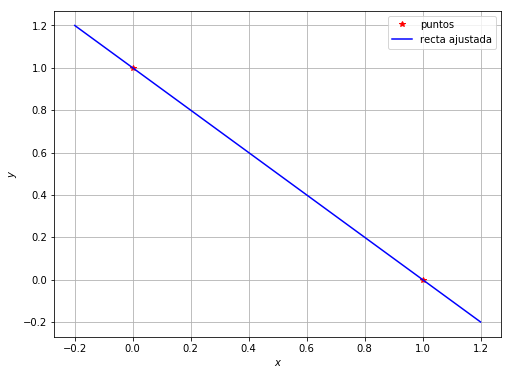

In [3]:
x = np.linspace(-0.2, 1.2, 100)
y = b1*x+b0

plt.figure(figsize=(8,6))
plt.plot([P1[0], P2[0]], [P1[1], P2[1]], 'r*', label = 'puntos')
plt.plot(x, y, 'b', label = 'recta ajustada')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc = 'best')
plt.grid()
plt.show()

2. Consideramos $y=\beta_2 x^2 + \beta_1 x + \beta_0$. Evaluando en el punto $(-1,1)$, obtenemos $\beta_2(-1)^2 + \beta_1(-1) + \beta_0 = 1$. Ahora, evaluando en el punto $(0,0)$, obtenemos $\beta_2(0)^2 + \beta_1(0) + \beta_0 = 0$. Finalmente, evaluando en el punto $(1,1)$, obtenemos $\beta_2(1)^2 + \beta_1(1) + \beta_0 = 1$. De esta manera,
$$\left[\begin{array}{ccc} 1 & -1 & 1 \\ 1 & 0 & 0 \\ 1 & 1 & 1 \end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array}\right]=\left[\begin{array}{c} 1 \\ 0 \\ 1 \end{array}\right].$$
Resolviendo, $\beta_0=\beta_1=0$ y $\beta_2=1$.

In [4]:
P1 = [-1, 1]
P2 = [0, 0]
P3 = [1, 1]

X = np.array([[1, -1, 1], [1, 0, 0], [1, 1, 1]])
y = np.array([1, 0, 1])
b0, b1, b2 = np.linalg.inv(X).dot(y)
b0, b1, b2

(0.0, 0.0, 1.0)

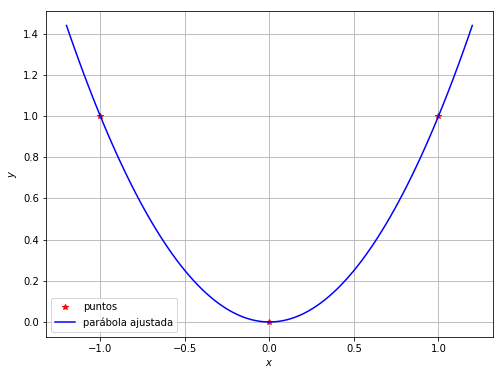

In [5]:
x = np.linspace(-1.2, 1.2, 100)
y = b2*x**2+b1*x+b0

plt.figure(figsize=(8,6))
plt.plot([P1[0], P2[0], P3[0]], [P1[1], P2[1], P3[1]], 'r*', label = 'puntos')
plt.plot(x, y, 'b', label = 'parábola ajustada')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc = 'best')
plt.grid()
plt.show()

### ¿Qué tienen en común los anteriores problemas?
Las curvas están completamente determinadas por los puntos (datos limpios, suficientes y necesarios).

Esto se traduce en que, al llevar el problema a un sistema de ecuaciones lineales, existe una única solución: **no hay necesidad, ni se puede optimizar nada**.

¿Tendremos datos así de '*bonitos*' en la vida real?

La realidad es que los datos que encontraremos en nuestra vida profesional se parecen más a esto...

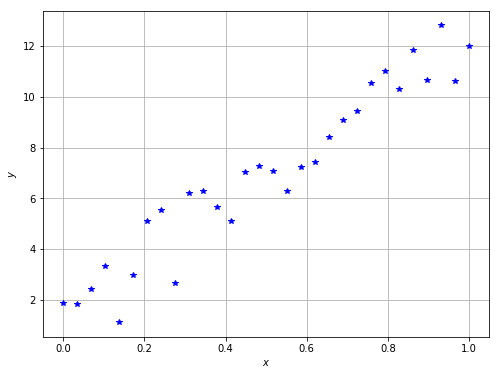

In [6]:
x = np.linspace(0, 1, 30)
y = 10*x + 2 + np.random.randn(30)

plt.figure(figsize=(8,6))
plt.plot(x, y, '*b')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

### ¿Cómo ajustamos una curva a esto?

## 1. Problema básico

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="400px" height="125px" />

Consideramos que tenemos un conjunto de n pares ordenados de datos $(x_i,y_i)$, para $i=1,2,3,\dots,n$.

### ¿Cuál es la recta que mejor se ajusta a estos datos?
Consideramos entonces ajustes de la forma $\hat{f}(x) = \beta_0+\beta_1 x = \left[1 \quad x\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad x\right]\boldsymbol{\beta}$ (lineas rectas).

Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

**Mínimos cuadrados**: el objetivo es seleccionar los coeficientes $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$, de forma que la función evaluada en los puntos $x_i$ ($\hat{f}(x_i)$) aproxime los valores correspondientes $y_i$.

La formulación por mínimos cuadrados, encuentra los $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza
$$\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2=\sum_{i=1}^{n}(y_i-\left[1 \quad x_i\right]\boldsymbol{\beta})^2=\left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2,$$

donde $\boldsymbol{y}=\left[y_1\quad\dots\quad y_n\right]$, y $\boldsymbol{X}=\left[\begin{array}{ccc}1 & x_1\\ \vdots & \vdots \\ 1 & x_n\end{array}\right].$ Esto es,

$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2$$

Para llevar a cabo la anterior minimización, el módulo pyomo_utilities.py ha sido actualizado con la función curve_polyfit(x, y, order, reg = None, robust = False). Esta función recibe:
- x: datos de variable independiente
- y: datos de variable dependiente
- order: orden del polinomio con el que se quiere ajustar
- reg_mode: modo de regularización
- robust: ajuste robusto o no.

Para los datos anteriores queríamos ajustar una recta (order = 1)...

In [7]:
import pyomo_utilities

In [8]:
beta = pyomo_utilities.curve_polyfit(x, y, 1)

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 2
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.8\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.039009809494018555
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


In [9]:
beta

array([  1.63172084,  10.70085074])

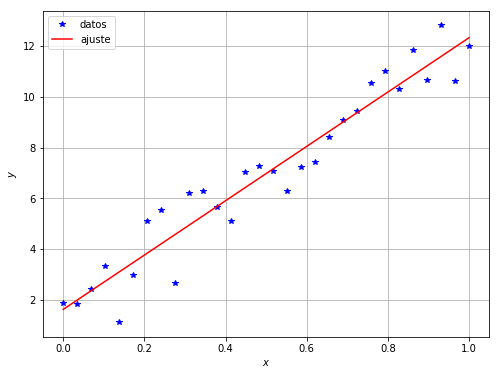

In [10]:
yhat = beta[0]+beta[1]*x

plt.figure(figsize=(8,6))
plt.plot(x, y, '*b', label = 'datos')
plt.plot(x, yhat, '-r', label = 'ajuste')
plt.legend(loc = 'best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

In [11]:
beta

array([  1.63172084,  10.70085074])

Note que la pendiente es aproximadamente $10$ y el intercepto es aproximadamente $2$.

La anterior idea se puede extender a ajuste polinomial...

## 2. Ajuste polinomial

Ahora, considere el siguiente conjunto de datos...

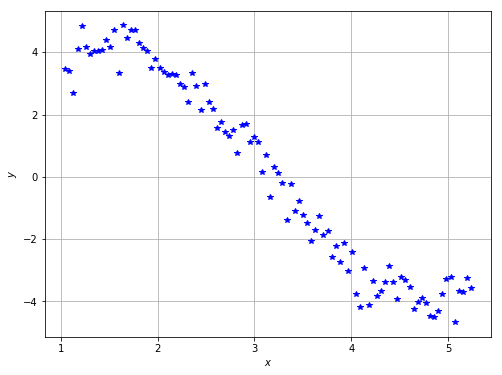

In [12]:
n = 100
x = np.linspace(np.pi/3, 5*np.pi/3, n)
y = 4*np.sin(x) + 0.5*np.random.randn(n)

plt.figure(figsize=(8,6))
plt.plot(x, y, '*b')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

¿Se ajustará bien una recta?

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 2
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.8\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.041207313537597656
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


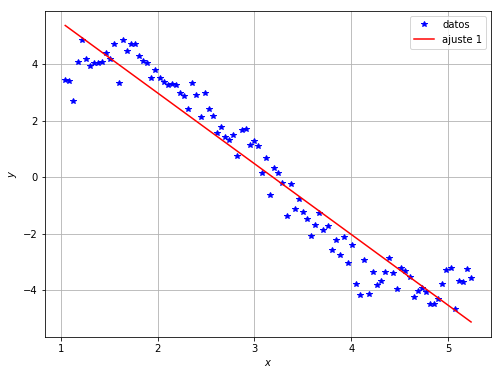

In [13]:
beta1 = pyomo_utilities.curve_polyfit(x, y, 1)
yhat1 = beta1[0]+beta1[1]*x

plt.figure(figsize=(8,6))
plt.plot(x, y, '*b', label = 'datos')
plt.plot(x, yhat1, '-r', label = 'ajuste 1')
plt.legend(loc = 'best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

### Veamos $\beta$ para el ajuste con recta

In [14]:
beta1

array([ 7.98982967, -2.50293165])

Creo que no. Pero, ¿Y una parábola?

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.8\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.03977060317993164
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


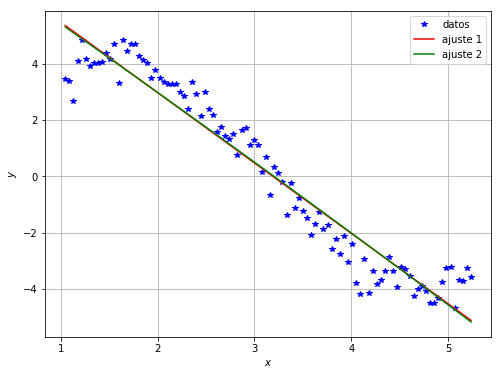

In [15]:
beta2 = pyomo_utilities.curve_polyfit(x, y, 2)
yhat2 = beta2[0]+beta2[1]*x+beta2[2]*x**2

plt.figure(figsize=(8,6))
plt.plot(x, y, '*b', label = 'datos')
plt.plot(x, yhat1, '-r', label = 'ajuste 1')
plt.plot(x, yhat2, '-g', label = 'ajuste 2')
plt.legend(loc = 'best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

### Veamos $\beta$ para el ajuste con parábola

In [16]:
beta2

array([ 7.82690092, -2.38073979, -0.01944744])

Tampoco. Quizá un polinomio cúbico...

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 4
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.8\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.037921905517578125
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


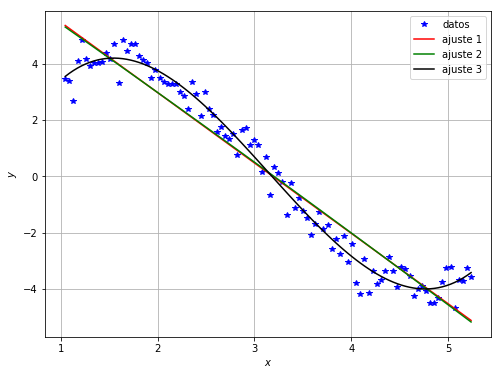

In [17]:
beta3 = pyomo_utilities.curve_polyfit(x, y, 3)
yhat3 = beta3[0]+beta3[1]*x+beta3[2]*x**2+beta3[3]*x**3

plt.figure(figsize=(8,6))
plt.plot(x, y, '*b', label = 'datos')
plt.plot(x, yhat1, '-r', label = 'ajuste 1')
plt.plot(x, yhat2, '-g', label = 'ajuste 2')
plt.plot(x, yhat3, '-k', label = 'ajuste 3')
plt.legend(loc = 'best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

### Veamos $\beta$ para el ajuste con cúbica

In [18]:
beta3

array([ -3.28838621,  10.87766285,  -4.66054632,   0.49243572])

Mucho mejor. Entonces, ¿mientras más se suba el orden mejor la aproximación?

**¡Cuidado! OVERFITTING...**

WARNING - Loading a SolverResults object with a warning status into model=unknown; message from solver=Ipopt 3.12.8\x3a Maximum Number of Iterations Exceeded.
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 21
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.8\x3a Maximum Number of Iterations Exceeded.
  Termination condition: maxIterations
  Id: 400
  Error rc: 0
  Time: 21.853753089904785
# ------------------------------------

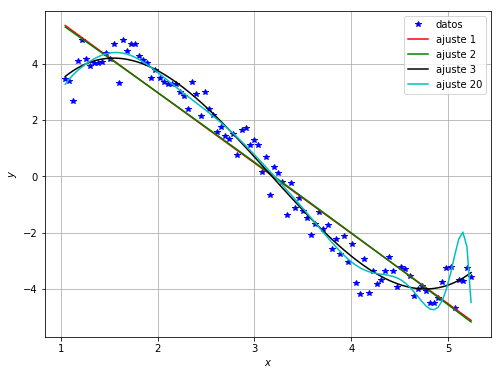

In [19]:
beta20 = pyomo_utilities.curve_polyfit(x, y, 20)
yhat20 = np.array([x**i for i in range(21)]).T.dot(beta20)

plt.figure(figsize=(8,6))
plt.plot(x, y, '*b', label = 'datos')
plt.plot(x, yhat1, '-r', label = 'ajuste 1')
plt.plot(x, yhat2, '-g', label = 'ajuste 2')
plt.plot(x, yhat3, '-k', label = 'ajuste 3')
plt.plot(x, yhat20, '-c', label = 'ajuste 20')
plt.legend(loc = 'best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

### De nuevo, veamos $\beta$

In [20]:
beta20

array([ -2.99601827e+02,   1.29509878e+03,  -2.35771589e+03,
         2.34911847e+03,  -1.36640002e+03,   4.53003071e+02,
        -7.26574480e+01,   1.33917878e+00,   1.08659060e+00,
        -3.84738566e-01,   1.17752929e-01,   2.64857831e-02,
        -1.91012309e-02,   1.40328121e-03,   5.68743989e-04,
        -8.56202807e-05,   1.40513725e-05,  -8.84069039e-06,
         2.11358480e-06,  -2.07887982e-07,   7.41590908e-09])

**¡Cuidado!** ver el tamaño de algunos coeficientes. Cuando los coeficientes son grandes, ¿qué pasa?

Es conveniente ver el error como función del orden del polinomio... **selección de modelos**

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 2
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.8\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.0728909969329834
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# =======

  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.04136538505554199
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 11
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.8\x3a Optimal Solution Found
  Termi

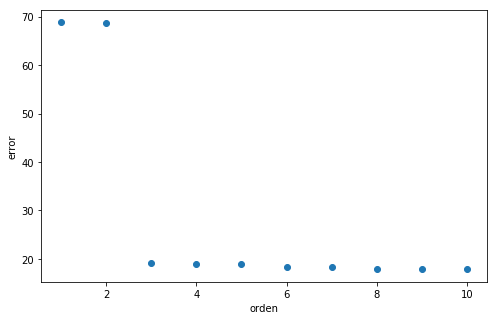

In [21]:
e_ms = []
for i in range(10):
    beta = pyomo_utilities.curve_polyfit(x, y, i+1);
    yhat = np.array([x**j for j in range(i+2)]).T.dot(beta)
    e_ms.append(sum((y - yhat)**2))
    
plt.figure(figsize=(8,5))
plt.plot(np.arange(10)+1, e_ms, 'o')
plt.xlabel('orden')
plt.ylabel('error')
plt.show()

En efecto, parece que con $3$ es suficiente.

### ¿Cómo prevenir el *overfitting* sin importar el orden del modelo?

## 3. Regularización

Vimos que la solución de mínimos cuadrados es:
$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2.$$

Sin embargo, si crecemos el orden del modelo hay overfitting y algunos coeficientes óptimos $\boldsymbol{\beta}$ crecen muchísimo. Que un coeficiente sea muy grande, significa que se le da mucha importancia a alguna característica (que quizá sea ruido... no sirve para predecir).

La regularización consiste en penalizar la magnitud de los coeficientes $\boldsymbol{\beta}$ en el problema de optimización, para que no crezcan tanto. 

### 3.1. Ridge

$$\boldsymbol{\beta}^{ridge} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|^2$$

WARNING - Loading a SolverResults object with a warning status into model=unknown; message from solver=Ipopt 3.12.8\x3a Maximum Number of Iterations Exceeded.
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 21
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.8\x3a Maximum Number of Iterations Exceeded.
  Termination condition: maxIterations
  Id: 400
  Error rc: 0
  Time: 24.2380588054657
# --------------------------------------

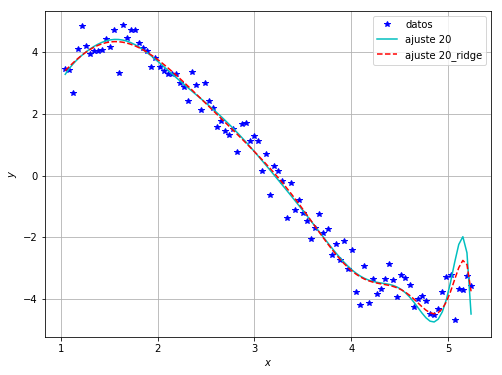

In [22]:
beta20_ridge = pyomo_utilities.curve_polyfit(x, y, 20, reg_mode = 'ridge', reg_coef = 0.1)
yhat20_ridge = np.array([x**i for i in range(21)]).T.dot(beta20_ridge)

plt.figure(figsize=(8,6))
plt.plot(x, y, '*b', label = 'datos')
plt.plot(x, yhat20, '-c', label = 'ajuste 20')
plt.plot(x, yhat20_ridge, '--r', label = 'ajuste 20_ridge')
plt.legend(loc = 'best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

In [23]:
beta20_ridge

array([  5.96845704e-01,   1.00469067e+00,   1.19785143e+00,
         9.93423102e-01,   3.27387492e-01,  -5.08673461e-01,
        -8.62364757e-01,   6.54871917e-02,   9.02985425e-01,
        -6.14489791e-01,   1.23575882e-01,   1.91616631e-02,
        -1.08708312e-02,   5.71713213e-04,   3.32680134e-04,
        -6.26091387e-05,   1.12469908e-05,  -4.20202369e-06,
         8.68656904e-07,  -8.05694059e-08,   2.76503340e-09])

### 3.2. Lasso

$$\boldsymbol{\beta}^{lasso} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|_1$$

La norma 1 no es más que la suma de los valores absolutos de las componentes $\left|\left|\boldsymbol{\beta}\right|\right|_1=\sum_{j=0}^m\left|\beta_j\right|$.

WARNING - Loading a SolverResults object with a warning status into model=unknown; message from solver=Ipopt 3.12.8\x3a Maximum Number of Iterations Exceeded.
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 21
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.8\x3a Maximum Number of Iterations Exceeded.
  Termination condition: maxIterations
  Id: 400
  Error rc: 0
  Time: 18.761409282684326
# ------------------------------------

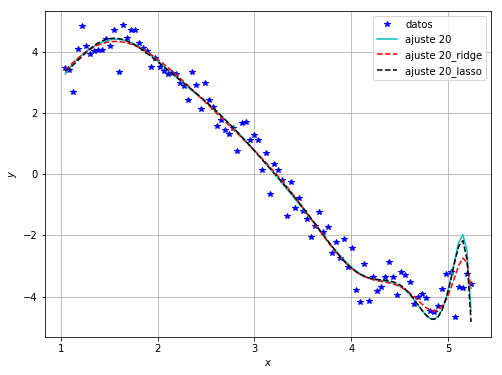

In [24]:
beta20_lasso = pyomo_utilities.curve_polyfit(x, y, 20, reg_mode = 'lasso', reg_coef = 0.0001)
yhat20_lasso = np.array([x**i for i in range(21)]).T.dot(beta20_lasso)

plt.figure(figsize=(8,6))
plt.plot(x, y, '*b', label = 'datos')
plt.plot(x, yhat20, '-c', label = 'ajuste 20')
plt.plot(x, yhat20_ridge, '--r', label = 'ajuste 20_ridge')
plt.plot(x, yhat20_lasso, '--k', label = 'ajuste 20_lasso')
plt.legend(loc = 'best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

In [25]:
beta20_lasso

array([  3.08987835e+01,  -1.04659473e-04,  -2.41518059e+02,
         4.99810847e+02,  -4.63221666e+02,   2.37282569e+02,
        -7.16673665e+01,   1.28240839e+01,  -8.08104895e-01,
        -4.44973402e-01,   1.43435037e-01,   2.08914151e-02,
        -1.63516266e-02,   1.38373280e-03,   4.13048873e-04,
        -6.72828717e-05,   1.28348404e-05,  -7.83326772e-06,
         1.87144221e-06,  -1.86732210e-07,   6.80664948e-09])

## 4. Ajuste robusto

Ahora, consideremos de nuevo el caso de la línea recta con un par de puntos atípicos al inicio y al final...

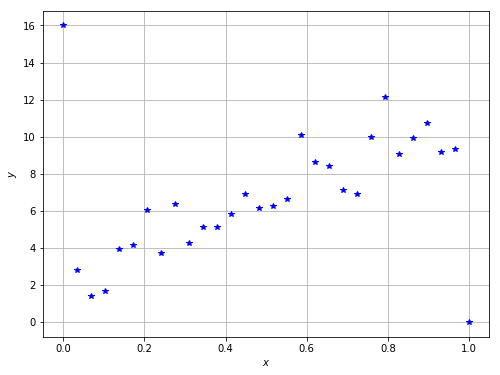

In [26]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 30)
y = 10*x + 2 + np.random.randn(30)

y[0] = 16
y[-1] = 0


plt.figure(figsize=(8,6))
plt.plot(x, y, '*b')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 2
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.8\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.05251717567443848
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


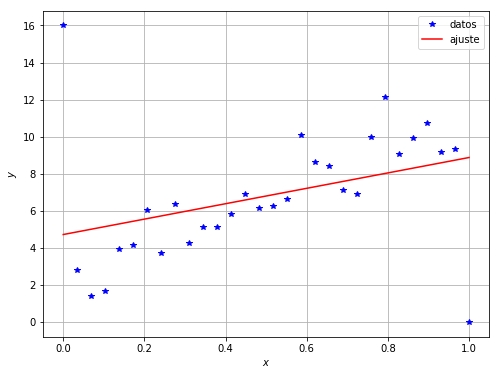

In [27]:
beta = pyomo_utilities.curve_polyfit(x, y, 1)
yhat = beta[0]+beta[1]*x

plt.figure(figsize=(8,6))
plt.plot(x, y, '*b', label = 'datos')
plt.plot(x, yhat, '-r', label = 'ajuste')
plt.legend(loc = 'best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

In [28]:
beta

array([ 4.71872109,  4.15646002])

Si estos puntos que parecen ser atípicos, hacen parte de una 'mala medición', vemos que el ajuste que obtenemos a los otros puntos es muy pobre...

**¿Cómo podemos evitar esto?** La respuesta es *ajuste robusto*.

In [29]:
beta = pyomo_utilities.curve_polyfit(x, y, 1, robust=True)
yhat = beta[0]+beta[1]*x

plt.figure(figsize=(8,6))
plt.plot(x, y, '*b', label = 'datos')
plt.plot(x, yhat, '-r', label = 'ajuste')
plt.legend(loc = 'best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

ValueError: Cannot load a SolverResults object with bad status: error

In [ ]:
beta

Mejor...

## 5. Actividad

1. Ajustar polinomios de grado 1 hasta grado 10 a los siguientes datos.
2. Graficar el error cuadrático acumulado contra el número de términos, y elegir un polinomio que ajuste bien y su grado no sea muy alto.
3. Para el grado de polinomio elegido, realizar el ajuste con ridge con coeficiente de 0.001.
4. Comparar los beta.

Abrir un nuevo notebook, llamado `Tarea7_ApellidoNombre` y subirlo a moodle en el espacio habilitado. Si no terminan esto en clase, tienen hasta mañana a las 23:00.

In [30]:
def f(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

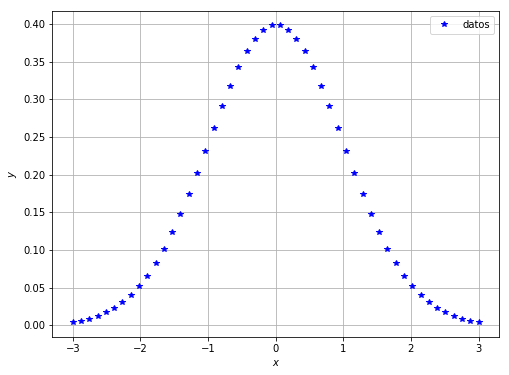

In [31]:
x = np.linspace(-3, 3)
y = f(x)

plt.figure(figsize=(8,6))
plt.plot(x, y, '*b', label = 'datos')
plt.legend(loc = 'best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

# Importante:
- Proximo martes 21 de noviembre no hay clase.
- Reposición: miércoles 22 de noviembre de 16:00 a 18:00 (clase de repaso, el viernes les confirmo el salón).
- Examen el viernes 24 de noviembre.
- Proyecto para el martes 28 de noviembre.
- No tuve tiempo de revisar proyectos. Les mando al correo institucional de acá a mañana.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>